<a href="https://colab.research.google.com/github/GitHubGetHope/ML_YAM/blob/master/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

---
Our project, entitled, “Credit Card Fraud Detection” consists of identifying whether a new transaction is fraudulent or not by using a card transaction dataset that contains a mix of fraudulent and non-fraudulent transactions. We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. 
We will try to through the various algorithms like Decision Trees, Logistic Regression, Random Forest... to implement the model and use datasets provided by Kaggle.

The aim of this project is to build a classifier that can detect credit card fraudulent transactions.


---
Group : ML_YAM

Membres: 

Leghmam Yassine,  Faik Marwa,  Ellatifi Anass


# Importing all the neccessery Libairies


In [0]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn

# Loading the credit card fraud dataset
 Load the dataset from the csv file using pandas, the best way is to mount the drive on colab and copy the path for the csv file.
 

In [6]:
data = pd.read_csv("/content/drive/My Drive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploration of data

In [7]:
print(data.shape)

(284807, 31)


In [0]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

###numeric data###

In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [0]:
data.isnull().values.any()

False

There is No "Null" values. 

Time to explain the data we are dealing with.

In [8]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
print(fraud.shape,valid.shape)
print('Fraud Cases: {}'.format(len(fraud))) 
print('Valid Transactions: {}'.format(len(valid)))
print(len(fraud)/float(len(valid))) 

(492, 31) (284315, 31)
Fraud Cases: 492
Valid Transactions: 284315
0.0017304750013189597


Most of the transactions are non-fraud. Only 0.46% fraudulent transaction out all the transactions. 




In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


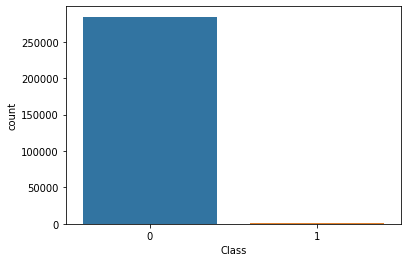

In [10]:
import seaborn as sns
sns.countplot(data["Class"],label="Count")
plt.show()

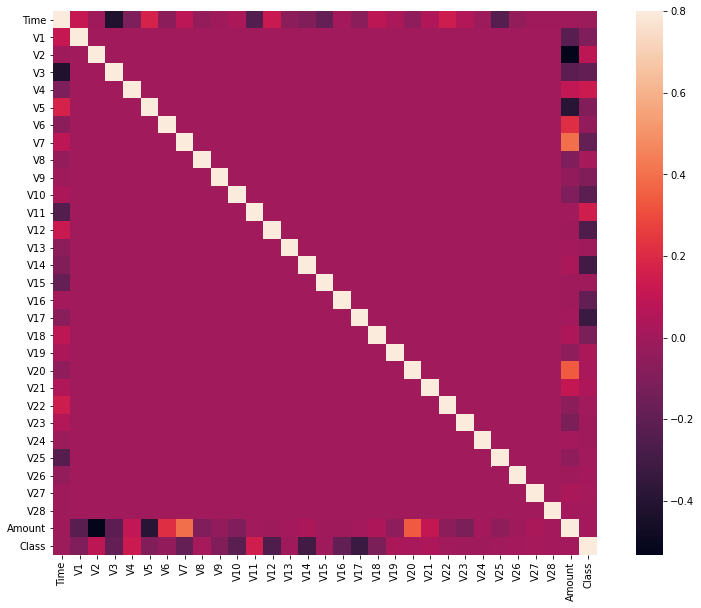

In [11]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (14, 10)) 
sns.heatmap(corrmat, vmax = 0.8, square = True) 
plt.show() 


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other

# Data modeling 

In [12]:
#Dividing the data into inputs parameters and outputs value format

X = data[['Time','Amount']]
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 



(284807, 2)
(284807,)


In [0]:
#Training and Testing Data Bifurcation
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 40)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 40,multi_class='ovr')
logreg.fit(xTrain,yTrain)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(xTrain, yTrain)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(xTest, yTest)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


In [15]:
print("w0 =", logreg.intercept_[0], ", w1 = ", logreg.coef_[0][0], ", w2 = ", logreg.coef_[0][1])

w0 = -5.872956642663144 , w1 =  -5.702828806137392e-06 , w2 =  0.0002130614986083354


# Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(xTrain, yTrain)
y_pred_tree = tree_clf.predict(xTest)

print(accuracy_score(yTest, y_pred_tree))


0.9971735542993575


In [26]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        feature_names=["x1", "x2"],
        class_names=["yellow", "blue"],
        rounded=True,
        filled=True

    )
graph = Source(dot_data)  
graph
    
   
    


# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [28]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Random forest is {}".format(acc))

The accuracy of Random forest is 0.9980162213405428


# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Naive Bayes is {}".format(acc)) 

The accuracy of Naive Bayes is 0.9982971103542713


# Support Vector Machines

In [30]:
 
from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)
yPred=svm.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of SVM is {}".format(acc)) 

The accuracy of SVM is 0.9982971103542713


Accuracy is always equal to 99% 
We want to create a balanced dataset.
The new dataset will contain the same number of fraudulent transactions and non-fraudulent transactions 


In [31]:
#first , we shuffle the data
data1 = data.sample(frac=1)

#we pick same number of fraudulent and non-fraudulent transactions
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

#we merge into one single data frame
normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

#we shuffle the new data frame
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
184048,126071.0,2.281334,-1.352149,-1.058602,-1.680748,-1.059093,-0.497605,-1.060405,-0.160784,-1.520445,1.738323,0.339237,-0.044868,0.774090,-0.293874,-0.930789,-0.315127,0.081569,0.447891,0.331435,-0.386871,-0.140907,0.100090,0.149512,-0.498722,-0.123715,-0.152634,0.006044,-0.064626,20.00,0
79525,58060.0,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,-5.074871,-6.778331,5.725255,-6.949172,-3.127795,-11.090425,-0.800273,-1.707501,-1.685473,0.274891,-2.028885,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1.00,1
152971,97693.0,0.647401,-0.774689,0.372791,-0.649799,-0.855406,0.282129,-0.816157,-0.085161,-1.116521,1.524837,1.717333,-2.712531,2.819814,1.138262,-0.558567,-1.452191,1.788285,1.209967,2.485301,0.147219,0.009696,0.730503,0.501343,0.723632,-1.920927,-0.085778,0.351588,0.324848,78.65,0
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1
192687,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,-1.429490,-0.375466,0.179095,-0.148449,-2.135155,-0.044916,-0.055333,1.778697,0.671832,-0.002021,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1


In [32]:
new_data1.shape

(984, 31)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


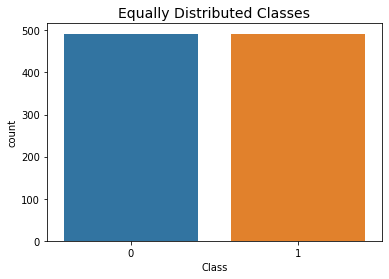

In [33]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [34]:
X = new_data1[['Time','Amount']]
Y = new_data1["Class"] 
print(X.shape) 
print(Y.shape) 

(984, 2)
(984,)


In [0]:
from sklearn.model_selection import train_test_split 
 
xTrain, xTest, yTrain, yTest = train_test_split( 
       X,Y, test_size = 0.2, random_state = 40)

# Random Forest on a balanced dataset

In [0]:
from sklearn.ensemble import RandomForestClassifier 
 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest)

In [37]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc)) 

The accuracy of Render forest is 0.7563451776649747
